<a href="https://colab.research.google.com/github/JangAyeon/ToBigs/blob/master/%5B10%5DRecommendation_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추천시스템 기초 실습

## 0. 데이터 불러오기 및 탐색

데이터는 movielens에서 제공하는 데이터 중 하나로, 가장 크기가 작은 버전으로 가져왔습니다.
- movies.csv: 영화 제목과 영화 장르에 대한 데이터
- ratings.csv: user(사용자)-movie(아이템) 선호도 데이터
- tags.csv: user가 해당 movie에 부여한 tag 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

**Load Data**

In [2]:
movies=pd.read_csv("/content/movies.csv")
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
links=pd.read_csv("/content/links.csv")
print(links.shape)
links.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
ratings=pd.read_csv("/content/ratings.csv")
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags=pd.read_csv("/content/tags.csv")
print(tags.shape)
tags.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## 1. Content-based Filtering 실습

content-based filtering은 movie(아이템) 간의 유사도를 계산하여 해당 movie와 유사한 movie를 추천해주는 간단한 추천 알고리즘

제공된 데이터에서 movie의 콘텐츠를 확인할 수 있는 데이터는 movies.csv의 장르와 tags.csv의 태그 정보가 있음

In [ ]:
# 아이템 간 유사도 계산을 위한 데이터프레임 만들기
# 열은 영화 장르가 될 수도 있고, 영화 태그가 될 수도 있음 (영화 태그의 경우 모든 영화에 대한 태그는 없음)

![image.png](attachment:image.png)

In [6]:
moviess = movies.join(movies.genres.str.get_dummies("|"))
movies_user=moviess.drop(["title","genres"],axis=1)
movies_user.set_index("movieId",inplace=True)
movies_user= movies_user.replace(0, np.NaN)

In [8]:
# 해당 데이터프레임은 사용자-영화 선호도 행렬입니당
print(movies_user.shape)
movies_user.head() #piv = ?

(9742, 20)


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# TF-IDF를 적용할 수 있지만 여기서는 skip
# TF-IDF를 적용하게 되면 다음과 같이 나오긴 합니당

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
movie['corpus'] = movie['genres'].apply(lambda x : ' '.join(x.split('|')))

In [ ]:
tfidv = TfidfVectorizer().fit(movie['corpus'])

In [ ]:
temp = pd.DataFrame(tfidv.transform(movie['corpus']).toarray())

In [ ]:
temp

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.000000,0.416846,0.516225,0.504845,0.267586,0.0,0.0,0.000000,0.482990,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.512361,0.000000,0.620525,0.000000,0.0,0.0,0.000000,0.593662,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.570915,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.821009,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.505015,0.0,0.0,0.466405,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.726241,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.436010,0.000000,0.614603,0.000000,0.318581,0.0,0.0,0.000000,0.575034,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9738,0.000000,0.000000,0.682937,0.000000,0.354002,0.0,0.0,0.000000,0.638968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9739,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9740,0.578606,0.000000,0.815607,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# 영화-영화의 유사도를 코사인 유사도를 사용해서 구해줍니당
movies_user = movies_user.fillna(0)
item_sim = cosine_similarity(movies_user, movies_user) #CBF = ??

In [14]:
# movie - moive 아이템 간 유사도 데이터프레임
item_sim_df = pd.DataFrame(data=item_sim,index=movies.movieId,columns=movies.movieId)
item_sim_df

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,0.258199,0.316228,0.774597,0.00000,0.258199,0.000000,0.000000,0.447214,0.447214,0.200000,0.258199,0.000000,0.000000,0.000000,0.000000,0.00000,0.316228,0.000000,0.400000,0.000000,0.00000,0.0,0.316228,0.000000,0.632456,0.316228,0.00000,0.000000,0.000000,0.00000,...,0.0,0.316228,0.447214,0.258199,0.258199,0.200000,0.670820,0.258199,0.447214,0.0,0.516398,0.600000,0.000000,0.316228,0.447214,0.774597,0.316228,0.0,0.258199,0.000000,0.000000,0.258199,0.0,0.000000,0.447214,0.00000,0.00000,0.447214,0.0,0.447214,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,0.000000,0.000000,0.666667,0.00000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.408248,0.000000,0.516398,0.000000,0.00000,0.0,0.408248,0.000000,0.408248,0.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.333333,0.333333,0.258199,0.577350,0.000000,0.577350,0.0,0.333333,0.516398,0.000000,0.000000,0.000000,0.666667,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.0,0.288675,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,0.816497,0.500000,0.000000,0.00000,0.408248,0.000000,0.500000,0.707107,0.707107,0.316228,0.408248,0.000000,0.000000,0.000000,0.500000,0.00000,0.000000,0.500000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.500000,1.000000,0.00000,0.000000,0.000000,0.00000,...,0.0,0.500000,0.707107,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.0,0.408248,0.316228,0.000000,1.000000,0.707107,0.408248,0.500000,0.0,0.000000,0.000000,0.000000,0.408248,0.0,0.500000,0.707107,0.00000,0.00000,0.000000,0.0,0.353553,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,1.000000,0.408248,0.000000,0.57735,0.333333,0.408248,0.816497,0.577350,0.577350,0.516398,0.333333,0.258199,0.000000,0.408248,0.816497,0.57735,0.408248,0.816497,0.258199,0.408248,0.57735,0.0,0.408248,0.408248,0.408248,0.816497,0.57735,0.408248,0.333333,0.57735,...,0.0,0.408248,0.577350,0.000000,0.000000,0.258199,0.000000,0.333333,0.000000,0.0,0.333333,0.258199,0.408248,0.816497,0.577350,0.333333,0.816497,0.0,0.000000,0.000000,0.000000,0.666667,0.0,0.816497,0.577350,0.57735,0.57735,0.000000,0.0,0.288675,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.577350,0.707107,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.447214,0.577350,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.707107,0.707107,0.00000,0.000000,0.000000,0.00000,...,0.0,0.707107,1.000000,0.000000,0.000000,0.000000,0.000000,0.577350,0.000000,0.0,0.577350,0.447214,0.000000,0.707107,1.000000,0.577350,0.707107,0.0,0.000000,0.000000,0.000000,0.577350,0.0,0.000000,1.000000,0.00000,0.00000,0.000000,0.0,0.500000,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [15]:
# 각 영화와 다른 영화와의 유사도가 모두 계산되어 있고, 유사도가 높은 영화가 가장 비슷한 영화라고 할 수 있습니당
# 입력 아이템과 가장 유사한 아이템 TOP10개를 뽑아봅시당
def getCBF(movieId):
  Id=movieId
  movie_info=movies[movies["movieId"]==Id]
  print("입력 영화: "+movie_info["title"].to_string()[len(str(Id)):].strip())
  print("입력 영화 장르: "+movie_info["genres"].to_string()[len(str(Id)):].strip())
  print("\n")
  print("=====Most similar List=====")
  recommend=item_sim_df[Id].sort_values(ascending=False).index.tolist()[:10]
  recommend=item_sim_df[Id].sort_values(ascending=False).index.tolist()[:10]
  movies_id=movies.set_index("movieId",drop=False)
  
  return movies_id.loc[recommend]

In [16]:
getCBF(193583)

입력 영화: No Game No Life: Zero (2017)
입력 영화 장르: Animation|Comedy|Fantasy


=====Most similar List=====


,movieId,title,genres
movieId,,,
79008,79008,South Park: Imaginationland (2008),Animation|Comedy|Fantasy
126577,126577,"Daddy, I'm A Zombie (2012)",Animation|Comedy|Fantasy
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
72692,72692,Mickey's Once Upon a Christmas (1999),Animation|Comedy|Fantasy
4158,4158,Monkeybone (2001),Animation|Comedy|Fantasy
182297,182297,Porky in Wackyland (1938),Animation|Comedy|Fantasy
6773,6773,"Triplets of Belleville, The (Les triplettes de...",Animation|Comedy|Fantasy
7228,7228,Cool World (1992),Animation|Comedy|Fantasy
139855,139855,Anomalisa (2015),Animation|Comedy|Fantasy


## 2. Collaborative Filtering 실습

User-based CF를 실습해 봅시당

![image.png](attachment:image.png)

In [ ]:
# User-Item 간 선호도 데이터프레임 만들기

In [21]:
# 해당 데이터프레임은 사용자-영화 선호도 데이터프레임입니당
user_item = pd.merge(ratings, movies, on='movieId')
ratings = user_item[['userId', 'movieId', 'rating']]
user_movie_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
user_movie_matrix #piv=???

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.5,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,4.5,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,2.0,NaN,3.5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.5,3.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
user_movie_matrix = user_movie_matrix.fillna(0)

In [24]:
# 사용자 간 유사도 구하기
item_sim = cosine_similarity(user_movie_matrix, user_movie_matrix)
# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=user_movie_matrix.index,
                          columns=user_movie_matrix.index)
print(item_sim_df.shape)
item_sim_df #CF=???

(610, 610)


userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,0.132499,0.016458,0.092971,0.113238,0.160689,0.169858,0.264358,0.214868,0.325376,0.160969,0.153162,0.050691,0.106669,0.155193,0.099261,0.105791,0.238933,0.202866,0.145251,0.099781,0.164454,0.146211,0.151945,0.083544,0.074508,0.071673,0.144736,0.138588,0.329782,0.094755,...,0.090224,0.131072,0.253480,0.093450,0.062668,0.051803,0.317319,0.000000,0.141129,0.249326,0.057399,0.048914,0.052175,0.100406,0.114076,0.123280,0.122782,0.183922,0.118112,0.324766,0.136809,0.143934,0.174413,0.141960,0.110558,0.123713,0.312843,0.011280,0.282412,0.291272,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,0.044419,0.000000,0.043918,0.016901,0.119778,0.093728,0.103755,0.166253,0.012571,0.014137,0.090880,0.144635,0.013597,0.129902,0.226008,0.000000,0.000000,0.058145,0.104059,0.149324,0.000000,0.017807,0.032428,0.043299,0.000000,0.054012,0.028500,0.023147,0.000000,0.017446,...,0.000000,0.032675,0.167959,0.035531,0.000000,0.000000,0.014870,0.000000,0.000000,0.061953,0.136703,0.219315,0.043620,0.000000,0.127551,0.089562,0.000000,0.055900,0.026429,0.056348,0.036147,0.030684,0.062033,0.013125,0.000000,0.104568,0.011986,0.048508,0.098000,0.023248,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,0.000000,0.000000,0.000000,0.003064,0.017251,0.032299,0.009813,0.028241,0.019142,0.008756,0.004017,0.003070,0.003081,0.002592,0.005100,0.000000,0.002332,0.029771,0.005974,0.000000,0.003507,0.015494,0.007156,0.000736,0.000000,0.000000,0.000000,0.004196,0.003639,0.002530,...,0.020899,0.008056,0.000000,0.000000,0.000000,0.029830,0.039894,0.000000,0.005749,0.033121,0.008561,0.000000,0.000000,0.000000,0.000000,0.000986,0.015793,0.003923,0.004791,0.027418,0.000000,0.000000,0.006460,0.001983,0.000000,0.025873,0.028970,0.000000,0.039539,0.013143,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,0.054767,0.049945,0.076949,0.048989,0.071551,0.164761,0.145058,0.123217,0.206053,0.113755,0.053014,0.043403,0.093971,0.071690,0.032862,0.061832,0.128954,0.135593,0.061308,0.058140,0.126182,0.200597,0.167247,0.045571,0.050148,0.113807,0.061031,0.090125,0.240976,0.053436,...,0.018553,0.182857,0.125627,0.064559,0.061035,0.005932,0.169440,0.000000,0.098777,0.148584,0.043871,0.047619,0.048474,0.041246,0.088289,0.064095,0.138766,0.049146,0.064485,0.219298,0.116111,0.068196,0.217116,0.082614,0.091974,0.107908,0.275436,0.016054,0.201610,0.211921,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,0.183805,0.058860,0.017157,0.221711,0.110152,0.082171,0.162633,0.121313,0.098758,0.096474,0.058264,0.033074,0.066889,0.096215,0.040705,0.294282,0.100491,0.121894,0.068876,0.065534,0.068585,0.233932,0.282323,0.029953,0.311472,0.022065,0.303078,0.377773,0.152956,0.321077,...,0.020016,0.124806,0.129338,0.341347,0.049306,0.000000,0.122199,0.000000,0.182382,0.117199,0.057538,0.000000,0.124645,0.348215,0.029293,0.072713,0.154315,0.377256,0.230961,0.152971,0.000000,0.359595,0.171864,0.137990,0.073238,0.096181,0.116071,0.000000,0.098599,0.137053,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [25]:
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [26]:

ratings_pred = predict_rating(user_movie_matrix.transpose().values,item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= user_movie_matrix.transpose().index,
                                   columns =user_movie_matrix.transpose().columns)
ratings_pred_matrix=ratings_pred_matrix.transpose()
print(ratings_pred_matrix.shape)
ratings_pred_matrix.head()

(610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.808175,0.831877,0.423003,0.027315,0.271766,1.026076,0.317491,0.046305,0.080917,1.053528,0.554692,0.097061,0.063558,0.119726,0.079437,0.749478,0.481750,0.161352,0.540799,0.096889,0.718456,0.260658,0.111390,0.207955,0.568281,0.096449,0.043662,0.086184,0.359094,0.020361,0.237941,1.564531,1.038981,0.495417,0.024523,0.721605,0.006443,0.123918,0.063242,0.057813,...,0.018355,0.006936,0.008515,0.014511,0.008515,0.007096,0.013470,0.077949,0.046168,0.009296,0.008367,0.022772,0.006524,0.007148,0.011354,0.008388,0.002182,0.002618,0.004221,0.004660,0.000777,0.004648,0.004519,0.001309,0.003491,0.000873,0.001309,0.000873,0.000873,0.000318,0.000247,0.000212,0.000282,0.000282,0.000247,0.000282,0.000247,0.000247,0.000247,0.002937
2,1.365000,0.620288,0.150230,0.009878,0.154428,0.614357,0.122923,0.025785,0.025225,0.623624,0.238592,0.058649,0.026034,0.020644,0.039126,0.633382,0.243514,0.134812,0.443222,0.093218,0.278765,0.119690,0.072792,0.092485,0.250850,0.056085,0.029015,0.041189,0.159866,0.002922,0.184664,1.020597,0.539356,0.269911,0.017934,0.402130,0.000000,0.041628,0.027018,0.023170,...,0.052765,0.013053,0.010310,0.021111,0.010310,0.008592,0.066716,0.188898,0.064974,0.006709,0.006038,0.031229,0.010090,0.022052,0.013747,0.012973,0.005763,0.006916,0.016798,0.007207,0.000527,0.003355,0.012602,0.003458,0.009221,0.002305,0.003458,0.002305,0.002305,0.016555,0.012876,0.011037,0.014716,0.014716,0.012876,0.014716,0.012876,0.012876,0.012876,0.024795
3,1.584153,0.796827,0.452255,0.022544,0.226689,1.143088,0.317018,0.059864,0.074613,0.941106,0.474836,0.153708,0.060771,0.078126,0.077205,0.744872,0.382060,0.226691,0.440744,0.089715,0.653677,0.247124,0.089185,0.235900,0.377762,0.101009,0.047000,0.058940,0.444077,0.040762,0.353903,1.588614,0.887766,0.440269,0.029526,0.603678,0.000000,0.111285,0.091287,0.058493,...,0.022974,0.002265,0.020852,0.030280,0.020852,0.017377,0.007051,0.078185,0.066995,0.001601,0.001441,0.046516,0.007926,0.001120,0.027803,0.010191,0.002483,0.002980,0.000000,0.005662,0.000832,0.000800,0.003625,0.001490,0.003973,0.000993,0.001490,0.000993,0.000993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.768037,0.747967,0.349428,0.031660,0.262678,0.923377,0.351348,0.040625,0.062458,0.929745,0.592736,0.075692,0.064032,0.141516,0.073361,0.725661,0.628216,0.158371,0.485174,0.077134,0.839709,0.241853,0.096244,0.208003,0.660822,0.115024,0.046381,0.127705,0.430185,0.034899,0.231467,1.618816,1.077805,0.594146,0.019275,0.774365,0.005048,0.137038,0.054366,0.066317,...,0.014664,0.005864,0.009357,0.015096,0.009357,0.009981,0.011677,0.067908,0.040267,0.017039,0.015335,0.019984,0.006589,0.006993,0.012477,0.008472,0.002260,0.002712,0.003424,0.004707,0.000567,0.008520,0.005195,0.001356,0.003616,0.000904,0.001356,0.000904,0.000904,0.000768,0.000597,0.000512,0.000682,0.000682,0.000597,0.000682,0.000597,0.000597,0.000597,0.004797
5,1.748180,0.910214,0.371129,0.059913,0.368868,0.869849,0.425598,0.068568,0.078188,1.216000,0.805819,0.050909,0.066400,0.193031,0.130513,0.634029,0.621462,0.114256,0.576880,0.076622,1.033503,0.347915,0.136800,0.162464,0.665668,0.150696,0.063257,0.091137,0.226105,0.010168,0.313019,1.561793,1.429541,0.755323,0.010477,0.982975,0.002707,0.137016,0.038350,0.074046,...,0.010471,0.003351,0.004927,0.007665,0.004927,0.005928,0.008061,0.043218,0.023173,0.005160,0.004644,0.012359,0.003144,0.002533,0.006570,0.004042,0.005189,0.006227,0.000478,0.002246,0.000270,0.002580,0.002335,0.003113,0.008302,0.002076,0.003

In [27]:
def get_unseen_movies(ratings_matrix, userId):

    # userId로 모든 영화정보 추출
    user_rating=ratings_matrix.loc[userId,:]
    
    # user_rating > 0 로 기존에 관람한 영화
    already_seen=user_rating[user_rating>0].index.tolist()
    
    # 모든 영화명
    movies_list=user_movie_matrix.columns.tolist()
    
    # 모든 영화 목록에서 봤던 영화는 제외하고 리스트 작성
    not_seen=[movie for movie in movies_list if movie not in already_seen]
    
    return not_seen 

In [28]:
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=5):
    # 예측 데이터에서 userId와 안 본 영화 제목을 추출해 예측 평점 내림 차순 
    recommend_movies=pred_df.loc[userId,unseen_list].sort_values(ascending=False)[:top_n]
    return recommend_movies

In [38]:
# 입력 사용자와 가장 가까운 유저에서 선호도가 가장 높은 아이템 TOP5를 추천해봅시당!
# 이 때, 입력 사용자가 이미 시청한/평가한 영화는 제외해야하도록 추천 리스트를 만들어봅시당
def getCF(userId):
  bar=pd.merge(ratings, movies_user, on='movieId')
  grouped = bar.groupby('userId')
  favorite_genre=grouped.sum()[movies_user.columns].iloc[userId,:].sort_values(ascending=False)
  favorite_genre.plot.bar()
  plt.show()
  
  unseen_list = get_unseen_movies(user_movie_matrix , userId)
  recommend_movies = recomm_movie_by_userid(ratings_pred_matrix , userId, unseen_list)
  movies_id=movies.set_index("movieId",drop=False)
 

  return  movies_id.loc[recommend_movies.index]

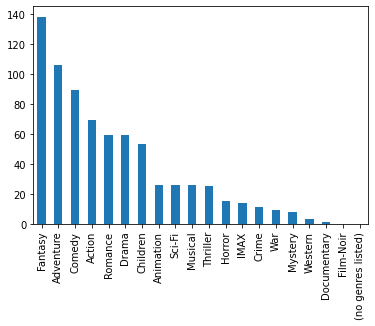

,movieId,title,genres
movieId,,,
356,356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,318,"Shawshank Redemption, The (1994)",Crime|Drama
457,457,"Fugitive, The (1993)",Thriller
480,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
150,150,Apollo 13 (1995),Adventure|Drama|IMAX


In [39]:
getCF(604)

## 3. Matrix Factorization 실습

같은 폴더에 있는 MF.py의 MatrixFactorization()을 적용해 봅시당

In [ ]:
import MF

In [ ]:
user_movie_matrix.head()# 사용자-영화 선호도 데이터프레임입니당

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 사용자-영화 선호도 데이터프레임입니당
piv.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import MF

In [ ]:
# MF.py를 참고하여 인자를 입력해 보아유
user_movie_matrix=user_movie_matrix.replace(np.NaN,0)
factorizer = MF.MatrixFactorization(user_movie_matrix.to_numpy(), k=3, learning_rate=0.01, reg_param=0.01, epochs=300, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0026


In [ ]:
# MF.py를 참고하여 인자를 입력해 보아유
user_movie_matrix=user_movie_matrix.replace(np.NaN,0)
factorizer = MF.MatrixFactorization(user_movie_matrix.to_numpy(), k=50, learning_rate=0.01, reg_param=0.01, epochs=300, verbose=True)
factorizer.fit()
R_reduced = factorizer.print_results()

Iteration: 10 ; cost = 0.0024
Iteration: 20 ; cost = 0.0021
Iteration: 30 ; cost = 0.0020
Iteration: 40 ; cost = 0.0018
Iteration: 50 ; cost = 0.0017
Iteration: 60 ; cost = 0.0016
Iteration: 70 ; cost = 0.0015
Iteration: 80 ; cost = 0.0014
Iteration: 90 ; cost = 0.0013
Iteration: 100 ; cost = 0.0013
Iteration: 110 ; cost = 0.0012
Iteration: 120 ; cost = 0.0011
Iteration: 130 ; cost = 0.0011
Iteration: 140 ; cost = 0.0011
Iteration: 150 ; cost = 0.0010
Iteration: 160 ; cost = 0.0010
Iteration: 170 ; cost = 0.0010
Iteration: 180 ; cost = 0.0009
Iteration: 190 ; cost = 0.0009
Iteration: 200 ; cost = 0.0009
Iteration: 210 ; cost = 0.0009
Iteration: 220 ; cost = 0.0008
Iteration: 230 ; cost = 0.0008
Iteration: 240 ; cost = 0.0008
Iteration: 250 ; cost = 0.0008
Iteration: 260 ; cost = 0.0008
Iteration: 270 ; cost = 0.0007
Iteration: 280 ; cost = 0.0007
Iteration: 290 ; cost = 0.0007
Iteration: 300 ; cost = 0.0007
User Latent P:
[[-0.15026226  0.05531575  0.05589838 ... -0.37950053 -0.1174393

In [ ]:
# Matrix Factorizaion으로 찾아낸 잠재요인을 기반으로 재생산한 행렬이네유
pd.DataFrame(R_reduced)

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,3.916813,4.478129,3.989630,5.379785,4.110406,3.985153,3.961904,2.639924,5.476944,4.276729,...,6.509292,5.524385,2.116642,2.880653,4.301188,4.462972,2.531997,6.550998,3.801199,4.647351
1,2.184512,2.647528,4.438986,3.284673,3.345467,5.661354,2.748255,5.884816,4.234426,4.672075,...,-1.178728,4.515293,-3.003231,2.025443,9.197922,8.028658,5.016721,2.849168,3.064769,-1.973399
2,2.144832,2.943030,2.545662,5.623397,2.860645,3.575103,1.021895,6.147655,-4.265640,1.858692,...,4.486339,4.060317,1.194300,-0.699251,-0.436023,5.858098,-4.860542,4.882236,1.647414,5.359447
3,3.959205,2.907817,2.102814,2.299841,2.182035,3.430950,3.910453,0.821664,3.978215,2.165412,...,0.209290,1.211698,2.032441,3.174808,1.745311,6.690086,4.037083,2.031316,-1.164085,-0.137408
4,3.964171,2.811951,3.315117,6.345289,1.525531,3.071239,3.626243,0.770739,2.839814,3.731160,...,0.306456,6.159778,4.240241,3.134073,3.038887,-1.295559,-0.689153,3.088915,-0.087376,6.419485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.584047,3.586055,3.117167,3.292284,3.454899,4.127064,2.899531,3.419142,3.911312,3.070247,...,4.179831,3.314298,2.560654,3.342530,4.263622,2.930955,3.043036,3.639795,4.003770,3.249624
606,3.964018,4.001081,3.304225,4.065460,3.054212,4.204882,2.263303,4.746627,3.482191,3.752764,...,1.898745,4.750200,6.627187,1.167195,7.004333,6.961326,2.975091,3.270241,3.284212,1.430936
607,2.920732,2.268228,2.067322,3.317607,1.963821,3.430579,1.579976,3.335937,1.385944,4.129249,...,3.476838,3.094610,4.916454,2.004667,1.270813,3.730215,5.886887,3.672390,-1.224488,4.392378
608,3.074765,1.799523,3.448718,4.510675,1.291637,4.346151,2.731501,2.280100,1.722135,3.971466,...,2.277239,4.412517,6.737233,4.733324,-0.618482,3.426381,2.852446,-0.553762,3.879336,3.399524


## 4. 본인만의 추천 리스트 만들어보기

배운 내용 혹은 알고 있는 추천 알고리즘을 사용해서 user의 다음 추천 아이템에 대한 TOP10 추천 리스트를 만들어 봅시당

코드를 이해할 수 있도록 주석을 꼼꼼하게 달아주시면 감사하겠습니다!

이번 과제를 풀면서 찾아보니까 추천 시스템을 구축할 때 Surprise 패키지를 사용한 코드들이 많더라고욥 근데 제가 이전에 surprise 패키지를 할 줄 몰라서ㅜㅜ 이번 기회에 강의랑 들으면서 주요모듈과 추천 알고리즘 클래스를 정리하고 필사해보았습니다. 

http://surpriselib.com/

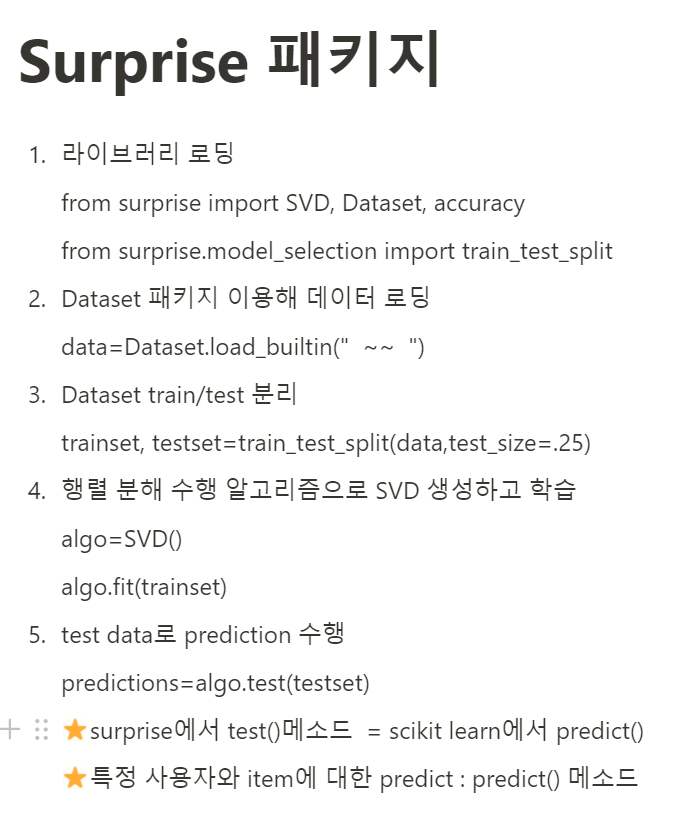

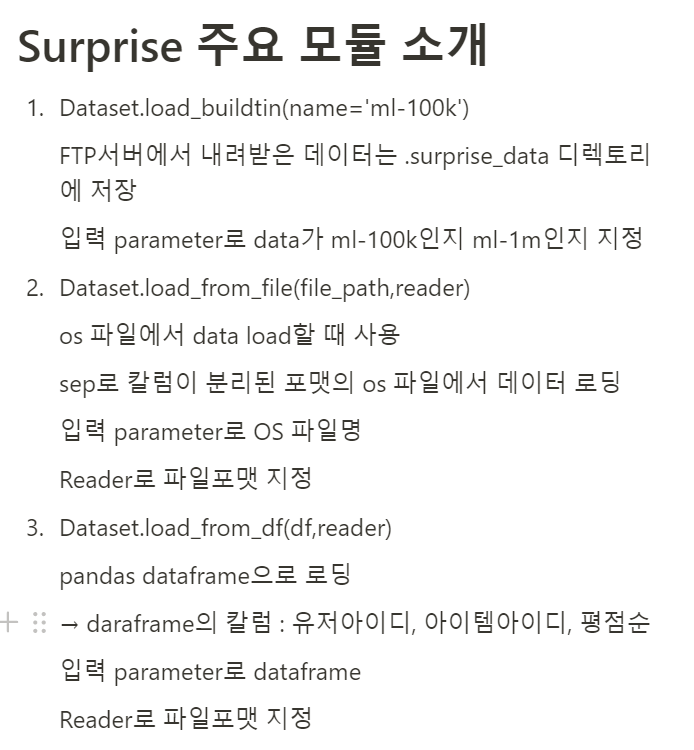

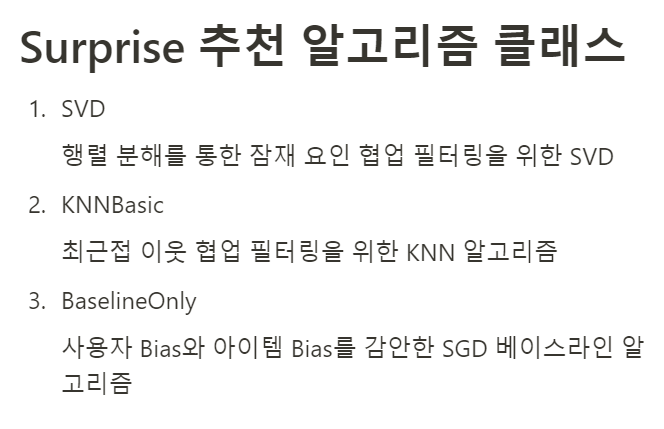

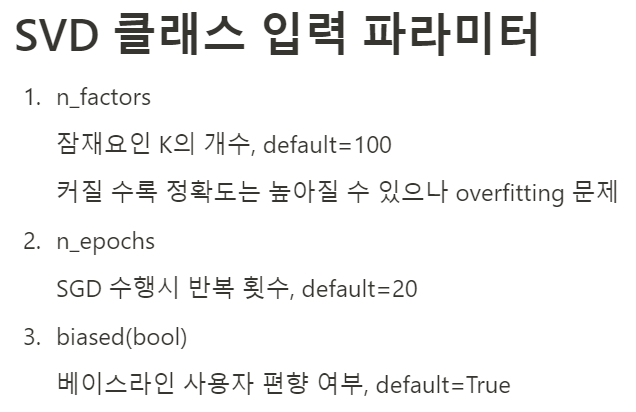

In [42]:
pip install scikit-surprise

     |████████████████████████████████| 11.8MB 239kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617549 sha256=fa734b644aec1a64b4cf8b188004259eb4f480eeb87adb8f3a7257942e0dd9ef
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [43]:
import surprise 

print(surprise.__version__)

1.1.1


In [44]:
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

In [45]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/ratings.csv') 
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다. 
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

In [47]:
from surprise.model_selection import cross_validate 

# Pandas DataFrame에서 Surprise Dataset으로 데이터 로딩 
ratings = pd.read_csv('/content/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8837  0.8764  0.8703  0.8669  0.8714  0.8738  0.0058  
MAE (testset)     0.6789  0.6709  0.6696  0.6677  0.6707  0.6715  0.0038  
Fit time          4.06    4.12    3.97    3.99    3.99    4.03    0.06    
Test time         0.22    0.12    0.22    0.11    0.16    0.17    0.05    


{'fit_time': (4.064663410186768,
  4.116104602813721,
  3.973877191543579,
  3.985081911087036,
  3.9907240867614746),
 'test_mae': array([0.67889021, 0.67088129, 0.66956952, 0.66767043, 0.67067891]),
 'test_rmse': array([0.8837359 , 0.87643131, 0.87030504, 0.86691412, 0.871396  ]),
 'test_time': (0.21766209602355957,
  0.1161649227142334,
  0.2226095199584961,
  0.11284637451171875,
  0.16489243507385254)}

In [ ]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정. 
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200] }

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

**Surprise 를 이용한 개인화 영화 추천 시스템 구축**

In [52]:
import pandas as pd

ratings = pd.read_csv('/content/ratings.csv')
# ratings_noh.csv : index 와 header 제거해 파일 생성
ratings.to_csv('/content/ratings_noh.csv', index=False, header=False)

**DatasetAutoFolds를 이용해 전체 data -> trainset**

In [53]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))

data_folds = DatasetAutoFolds(ratings_file='/content/ratings_noh.csv', reader=reader)

#전체 data -> 학습 data
trainset = data_folds.build_full_trainset()

In [54]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [55]:
# 영화 속성 정보 있는 data 로딩
movies = pd.read_csv('/content/movies.csv')

# 9번 사용자의 42번 영화에 대한 data 확인 
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42]) #아직 평가 안 함함

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


In [56]:
uid = str(9) #9번 유저
iid = str(42) #42번 영화

pred = algo.predict(uid, iid, verbose=True) #예측

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


In [57]:
def get_unseen_surprise(ratings, movies, userId):
    #입력 사용자가 영화에 평점 단 영화 목록
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화 movieId 목록
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화 movieId 목록에서 이미 봐서 평가한 영화는 제외한 목록
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))
    
    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


In [58]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 아직 감상하지 않은 영화에 predict() 메서드 적용한 거 목록으로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    #prediction 객체 안에 est값으로 정렬해야함 -> key를 지정

    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est( ) 반환값을 내림차순으로 정렬하고 최상위 n개 추출
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # 추출된 영화의 정보/아이디/예상 평점/제목 
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
